# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from collections import Counter

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."


In [ ]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Exploration

In [9]:
df.sample(20)

,reviews
155,✅ Trip Verified | We chose Rotterdam and Lond...
720,✅ Trip Verified | Extremely disappointed In t...
462,✅ Trip Verified | My original flight was canc...
598,✅ Trip Verified | BA is still charging premium...
523,✅ Trip Verified | Check in was a shambles at ...
726,✅ Trip Verified | After 1h queuing at the che...
135,Not Verified | We had a Premium Economy retur...
306,✅ Trip Verified | I arrived at the airport ab...
577,Not Verified | Reasonably smooth boarding. Me...
877,✅ Trip Verified | Warsaw to London. Everythin...


In [8]:
print(len(df))

1000


In [10]:
df.shape

(1000, 1)

In [11]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | Flying London City to Geneva...
freq,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [13]:
df.isnull()

,reviews
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [14]:
df.isnull().sum()

,0
reviews,0


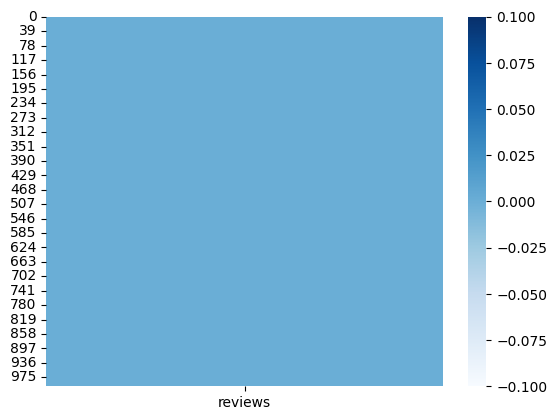

In [16]:
sns.heatmap(df.isnull(),cmap = "Blues")
plt.show()

# Text Cleaning

In [25]:

def clean_text(text):
    text = str(text)

    text = text.lower()


    text = re.sub(r'[^\w\s]', '', text)


    text = re.sub(r'\btrip verified\b', '', text)
    text = re.sub(r'\bnot verified\b', '', text)


    text = re.sub(r'http\S+|www.\S+', '', text)


    text = re.sub(r'\d+', '', text)


    text = re.sub(r'\b\w{1,2}\b', '', text)


    text = re.sub(r'\s+', ' ', text).strip()

    return text


df['reviews_cleaned'] = df['reviews'].apply(clean_text)

df

,reviews,reviews_cleaned
0,check was smooth enough boarding was chaotic w...,check was smooth enough boarding was chaotic w...
1,although transferring this flight through heat...,although transferring this flight through heat...
2,are extremely grateful the crew flight from ca...,are extremely grateful the crew flight from ca...
3,had appalling experience with british airways ...,had appalling experience with british airways ...
4,good points the cabin crew they were helpful p...,good points the cabin crew they were helpful p...
...,...,...
995,chicago zurich via london delays after delays ...,chicago zurich via london delays after delays ...
996,glasgow london smooth flight departurearrival ...,glasgow london smooth flight departurearrival ...
997,having booked this flight week before the stri...,having booked this flight week before the stri...
998,wouldnt even rate them business class passenge...,wouldnt even rate them business class passenge...


In [26]:
df.drop('reviews',axis = 1, inplace=True)
df

,reviews_cleaned
0,check was smooth enough boarding was chaotic w...
1,although transferring this flight through heat...
2,are extremely grateful the crew flight from ca...
3,had appalling experience with british airways ...
4,good points the cabin crew they were helpful p...
...,...
995,chicago zurich via london delays after delays ...
996,glasgow london smooth flight departurearrival ...
997,having booked this flight week before the stri...
998,wouldnt even rate them business class passenge...


In [32]:
positive_keywords = [
    'great', 'excellent', 'nice', 'smooth', 'enjoyed', 'quick',
    'refurbished', 'regular', 'happy', 'good'
]

neutral_keywords = [
    'average', 'okay', 'not bad', 'fine', 'decent', 'reasonable', 'normal'
]

negative_keywords = [
    'worst', 'terrible', 'horrible', 'shambolic', 'poor', 'bad', 'delayed',
    'lost', 'never', 'not', 'stinking', 'sad', 'rebook', 'crowded'
]


def label_review(text):
    text = str(text).lower()

    if any(word in text for word in negative_keywords):
        return 2
    elif any(word in text for word in positive_keywords):
        return 0
    elif any(word in text for word in neutral_keywords):
        return 1
    else:
        return 1


df['label'] = df['reviews_cleaned'].apply(label_review)
df

,reviews_cleaned,label
0,check was smooth enough boarding was chaotic w...,2
1,although transferring this flight through heat...,2
2,are extremely grateful the crew flight from ca...,1
3,had appalling experience with british airways ...,2
4,good points the cabin crew they were helpful p...,2
...,...,...
995,chicago zurich via london delays after delays ...,2
996,glasgow london smooth flight departurearrival ...,0
997,having booked this flight week before the stri...,2
998,wouldnt even rate them business class passenge...,2


# Data Analysis

<ipython-input-35-657278e3e612>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


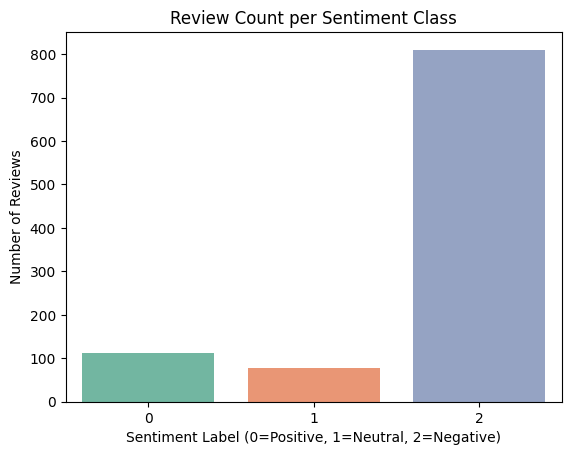

In [35]:
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Review Count per Sentiment Class')
plt.xlabel('Sentiment Label (0=Positive, 1=Neutral, 2=Negative)')
plt.ylabel('Number of Reviews')
plt.show()

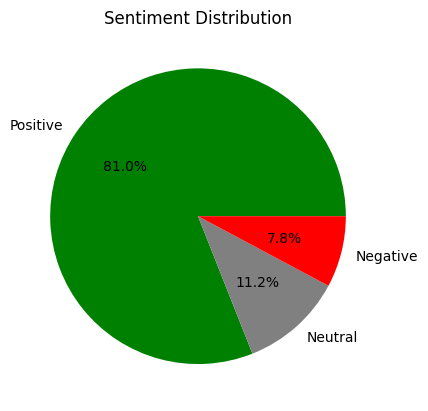

In [36]:
df['label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Positive', 'Neutral', 'Negative'],
    colors=['green', 'gray', 'red']
)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

<ipython-input-42-07464063b770>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=df, palette='Set3')


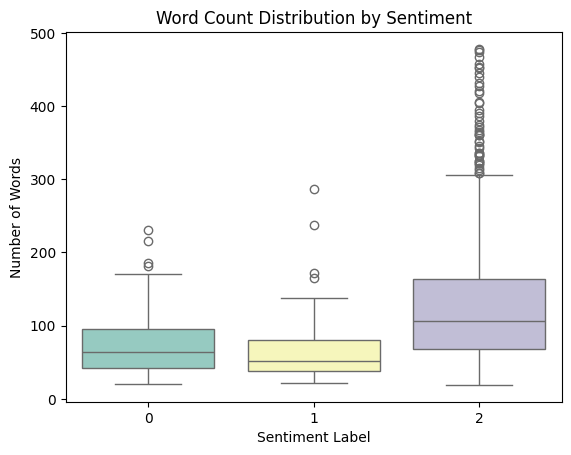

In [42]:
df['word_count'] = df['reviews_cleaned'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='label', y='word_count', data=df, palette='Set3')
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Words')
plt.show()

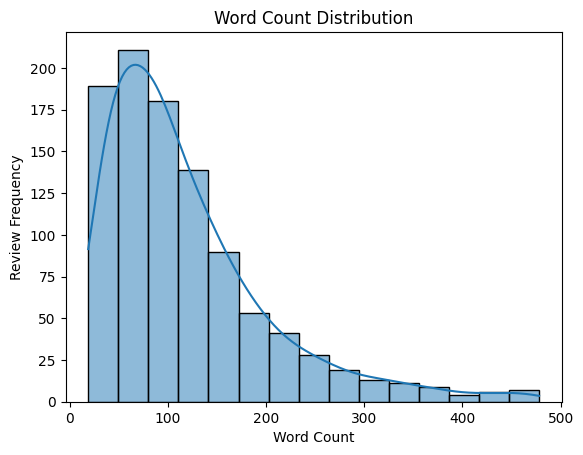

In [44]:
sns.histplot(df['word_count'], bins=15, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Review Frequency')
plt.show()

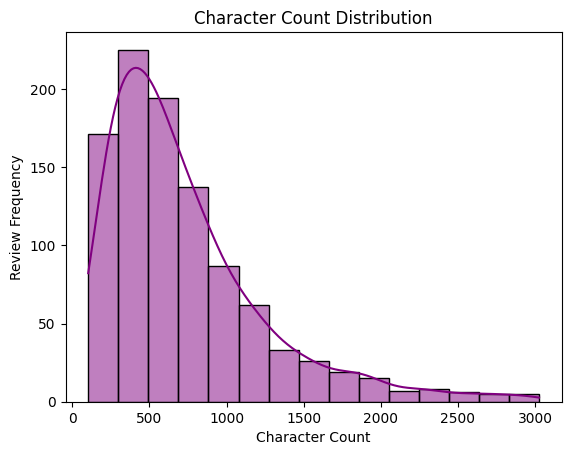

In [46]:
df['char_count'] = df['reviews_cleaned'].apply(lambda x: len(str(x)))
sns.histplot(df['char_count'], bins=15, kde=True, color='purple')
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Review Frequency')
plt.show()

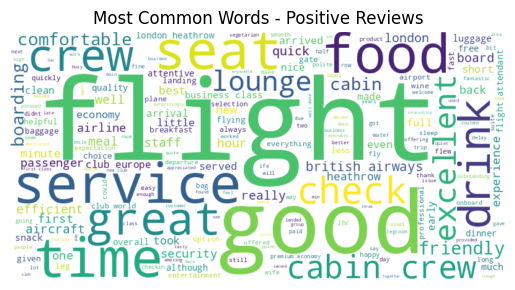

In [47]:
text_pos = " ".join(df[df['label'] == 0]['reviews_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_pos)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words - Positive Reviews')
plt.show()

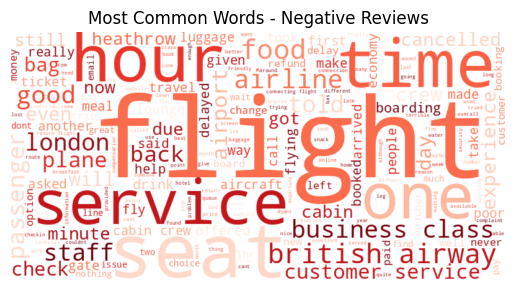

In [48]:
text_neg = " ".join(df[df['label'] == 2]['reviews_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_neg)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words - Negative Reviews')
plt.show()


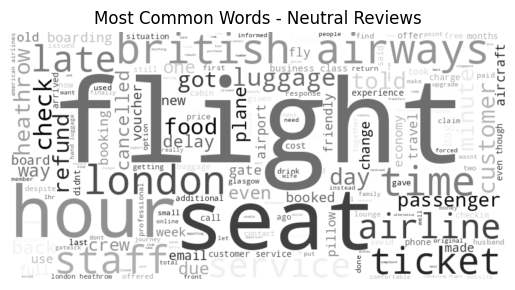

In [49]:
text_neu = " ".join(df[df['label'] == 1]['reviews_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='gray').generate(text_neu)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words - Neutral Reviews')
plt.show()


<ipython-input-50-c5d933679357>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='label', y='word_count', data=df, palette='Set1')


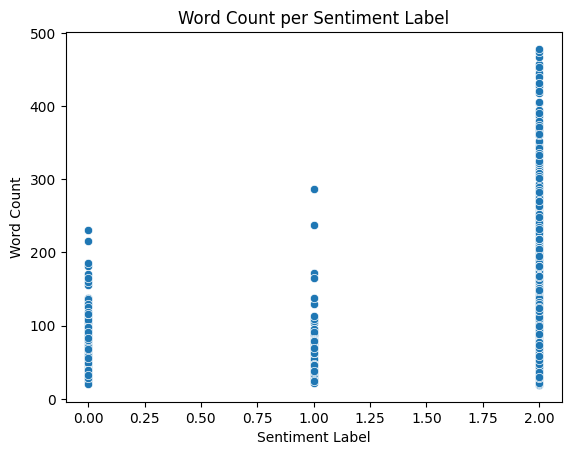

In [50]:
sns.scatterplot(x='label', y='word_count', data=df, palette='Set1')
plt.title('Word Count per Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Word Count')
plt.show()

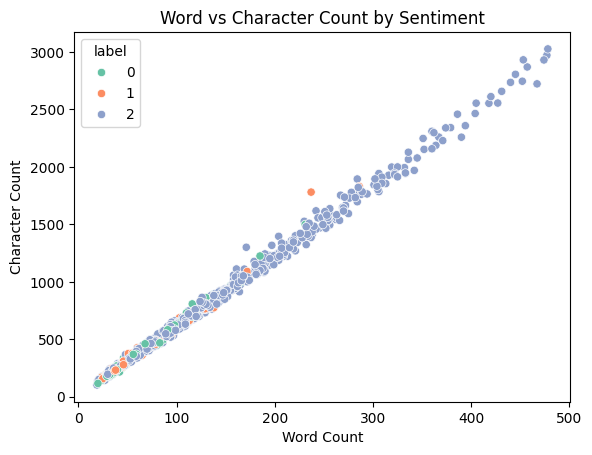

In [51]:
sns.scatterplot(x='word_count', y='char_count', data=df, hue='label', palette='Set2')
plt.title('Word vs Character Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.show()

<ipython-input-52-a224a04ef393>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Set2')


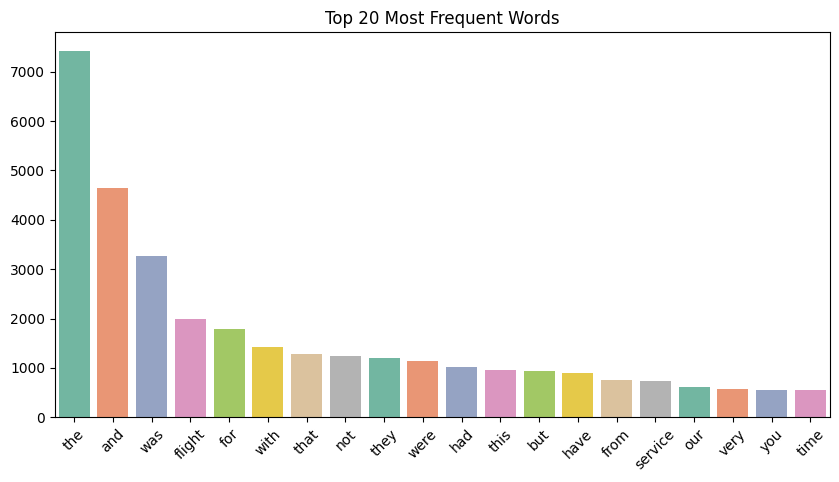

In [52]:
all_words = " ".join(df['reviews_cleaned']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='Set2')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

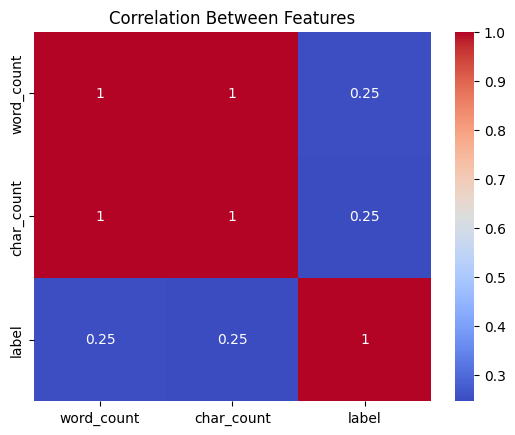

In [53]:
sns.heatmap(df[['word_count', 'char_count', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

<ipython-input-54-9926cb63540a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='word_count', data=df, palette='Set2')


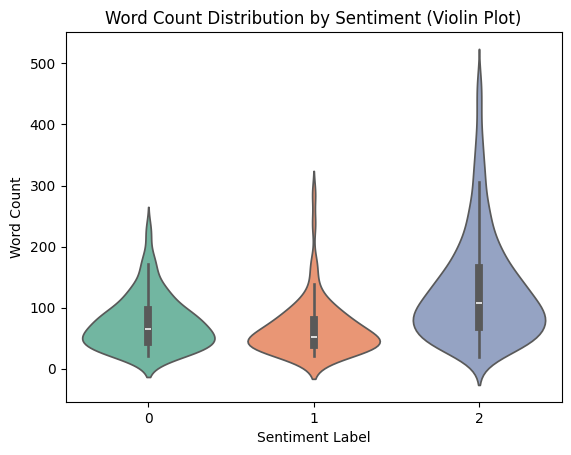

In [54]:
sns.violinplot(x='label', y='word_count', data=df, palette='Set2')
plt.title('Word Count Distribution by Sentiment (Violin Plot)')
plt.xlabel('Sentiment Label')
plt.ylabel('Word Count')
plt.show()